In [2]:
import scanpy as sc
from anndata import read_h5ad
import pandas as pd
import numpy as np
import scipy as sp
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

# scTRS tools
import scdrs

# autoreload
%load_ext autoreload
%autoreload 2

In [26]:
# Check results for a given trait
score_path = '/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/score_file/'\
    'score.tms_facs_with_cov.magma_10kb_top1000_zscore'
trait = 'UKB_460K.disease_ASTHMA_DIAGNOSED'
trait = 'PASS_ADHD_Demontis2018'
df_score = pd.read_csv(score_path+'/%s.score.gz'%trait, sep='\t')

In [27]:
df_downstream = pd.read_csv(score_path+'/downstream/%s.scdrs_group.cell_ontology_class'%trait, 
                           sep='\t', index_col=0)
df_downstream['assoc_fdr'] = multipletests(df_downstream["assoc_mcp"].values, alpha=0.1, method="fdr_bh")[1]
df_downstream.loc[df_downstream['assoc_fdr']<0.1]

,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2,assoc_fdr
medium spiny neuron,103.0,1000.0,0.000999,4.704687,0.007992,2.572392,0.0,0.0,29.0,0.05994
neuron,484.0,1000.0,0.000999,6.503790,0.006993,3.405645,0.0,7.0,38.0,0.05994


In [25]:
df_downstream.loc[['interneuron',
 'lung neuroendocrine cell',
 'medium spiny neuron',
 'neuroepithelial cell',
 'neuron',
 'neuronal stem cell']]

,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2,assoc_fdr
interneuron,240.0,1000.0,0.629371,-0.420696,0.363636,0.215148,0.0,0.0,0.0,1.000000
lung neuroendocrine cell,4.0,1000.0,0.999001,-2.444617,0.141858,1.319541,0.0,0.0,0.0,1.000000
medium spiny neuron,103.0,1000.0,0.830170,-0.963677,0.287712,0.576744,0.0,0.0,0.0,1.000000
neuroepithelial cell,151.0,1000.0,0.835165,-0.785420,0.769231,-0.742782,0.0,0.0,0.0,1.000000
neuron,484.0,1000.0,0.741259,-0.708507,0.290709,0.417873,0.0,2.0,2.0,1.000000
neuronal stem cell,97.0,1000.0,0.432567,0.121753,0.987013,-1.876868,0.0,0.0,0.0,0.925325


### Compare 2 sets of score files

n_file=74, n_file_ref=74, n_overlap=74
|           ADHD_Demontis2018            |  n_overlap_cell=110824  |  max_abs_dif=9.213e+04  |PCC=0.962 |
|         Alzheimers_Jansen2019          |  n_overlap_cell=110824  |  max_abs_dif=2.445e+04  |PCC=0.949 |
|     AtrialFibrillation_Nielsen2018     |  n_overlap_cell=110824  |  max_abs_dif=1.109e+05  |PCC=0.966 |
|            BIP_Mullins2021             |  n_overlap_cell=110824  |  max_abs_dif=4.335e+04  |PCC=0.966 |
|             CD_deLange2017             |  n_overlap_cell=110824  |  max_abs_dif=2.269e+04  |PCC=0.977 |
|                 Celiac                 |  n_overlap_cell=110824  |  max_abs_dif=7.255e+03  |PCC=0.965 |
|        Coronary_Artery_Disease         |  n_overlap_cell=110824  |  max_abs_dif=4.503e+04  |PCC=0.960 |
|         DrinksPerWeek_Liu2019          |  n_overlap_cell=110824  |  max_abs_dif=1.766e+04  |PCC=0.964 |
|         FastingGlucose_Manning         |  n_overlap_cell=110824  |  max_abs_dif=2.061e+04  |PCC=0.969 |
|Genera

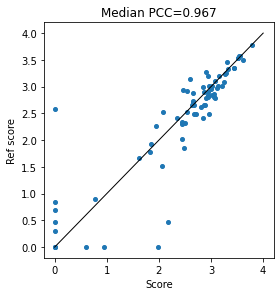

                                                nsig  nsig_ref  dif_ratio
UKB_460K.biochemistry_TotalBilirubin             0.0     383.0   0.002604
PASS_Type_2_Diabetes                             0.0       6.0   0.142857
PASS_Alzheimers_Jansen2019                       0.0       4.0   0.200000
UKB_460K.blood_WHITE_COUNT                     391.0    1381.0   0.283647
UKB_460K.cancer_BREAST                           0.0       2.0   0.333333
UKB_460K.body_BALDING1                         294.0     850.0   0.346651
UKB_460K.biochemistry_SHBG                     120.0     328.0   0.367781
UKB_460K.bp_DIASTOLICadjMEDz                   343.0     835.0   0.411483
UKB_460K.body_HEIGHTz                          787.0    1908.0   0.412782
UKB_460K.repro_MENARCHE_AGE                     88.0     183.0   0.483696
UKB_460K.disease_CARDIOVASCULAR                  0.0       1.0   0.500000
PASS_Primary_biliary_cirrhosis                 883.0    1552.0   0.569221
PASS_Lupus                            

In [2]:
DATA_PATH = '/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data'
score_path =  DATA_PATH+'/score_file/score.tms_facs_with_cov.magma_10kb_top1000_zscore'
# score_path_ref = DATA_PATH+'/score_file/score.tms_facs_with_cov.magma_10kb_1000'
# score_path_ref =  DATA_PATH+'/score_file/score.tms_facs_with_cov.magma_10kb_top1000_uniform'
# score_path_ref =  DATA_PATH+'/score_file/score.tms_facs_logtpm_with_cov.magma_10kb_top1000_zscore'
score_path_ref =  DATA_PATH+'/score_file/score.tms_facs_with_cov_adj_prop.magma_10kb_top1000_zscore'
check_file = '.score.gz'

file_exclude = ['PASS_BIP_Stahl2019.score.gz']

file_list = [x for x in os.listdir(score_path) if x.endswith(check_file) and (x not in file_exclude)]
file_list_ref = [x for x in os.listdir(score_path_ref) if x.endswith(check_file) and (x not in file_exclude)]
print('n_file=%d, n_file_ref=%d, n_overlap=%d'
      %(len(file_list), len(file_list_ref), len(set(file_list) & set(file_list_ref))))

df_stats = pd.DataFrame(index=sorted(set(file_list) & set(file_list_ref)), 
                        columns=['PCC', 'nsig', 'nsig_ref'], dtype=int)

for fname in sorted(set(file_list) & set(file_list_ref)):
    df_score = pd.read_csv(score_path+'/'+fname, sep='\t', index_col=0) 
    df_score_ref = pd.read_csv(score_path_ref+'/'+fname, sep='\t', index_col=0)
    
    cell_list = sorted(set(df_score.index) & set(df_score_ref.index))
    v1 = df_score.loc[cell_list, 'norm_score']
    v2 = df_score_ref.loc[cell_list, 'norm_score']
    dif = np.absolute((v1-v2)/v2).max()
    pcc = np.corrcoef(v1, v2)[0, 1]

    df_stats.loc[fname.replace('.score.gz','')] = [pcc, 
        multipletests(df_score["pval"].values, alpha=0.1, method="fdr_bh")[0].sum(),
        multipletests(df_score_ref["pval"].values, alpha=0.1, method="fdr_bh")[0].sum()
    ]
    
    print('|{:^40s}|{:^25s}|{:^25s}|{:^10s}|'.format(
        fname.replace(check_file,'').replace('PASS_','').replace('UKB_460K.',''),
        'n_overlap_cell=%d'%len(cell_list),
        'max_abs_dif=%0.3e'%dif, 'PCC=%0.3f'%pcc
    ))

# Check power
plt.figure(figsize=[4,4])
plt.scatter(np.log10(df_stats['nsig']+1), np.log10(df_stats['nsig_ref']+1),
            s=16)
plt.plot([0,4], [0,4], linewidth=1, color='k')
plt.xlabel('Score')
plt.ylabel('Ref score')
plt.tight_layout()
plt.title('Median PCC=%0.3f'%df_stats['PCC'].median())
plt.show()

df_stats['dif_ratio'] = (df_stats['nsig']+1)/(df_stats['nsig_ref']+1)
df_stats.sort_values('dif_ratio', inplace=True)
print(df_stats.loc[np.absolute(df_stats['dif_ratio']-1)>0.2, ['nsig', 'nsig_ref', 'dif_ratio']])

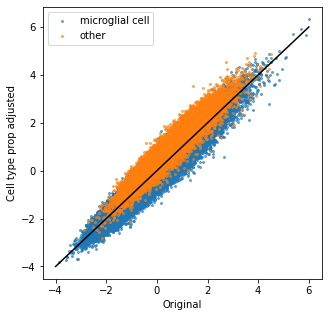

In [19]:
# ALZ 
DATA_PATH = '/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data'
score_path =  DATA_PATH+'/score_file/score.tms_facs_with_cov.magma_10kb_top1000_zscore'
score_path_ref =  DATA_PATH+'/score_file/score.tms_facs_with_cov_adj_prop.magma_10kb_top1000_zscore'

df_score = pd.read_csv(score_path+'/PASS_Alzheimers_Jansen2019.score.gz', sep='\t', index_col=0) 
df_score_ref = pd.read_csv(score_path_ref+'/PASS_Alzheimers_Jansen2019.score.gz', sep='\t', index_col=0)

adata = read_h5ad(DATA_PATH+'/tabula_muris_senis/tabula-muris-senis-facs-official-raw-obj.h5ad')

ind_select = adata.obs['cell_ontology_class']=='microglial cell'
plt.figure(figsize=[5,5])
plt.scatter(df_score.loc[~ind_select, 'norm_score'], df_score_ref.loc[~ind_select, 'norm_score'],
            s=4, alpha=0.6, label='microglial cell')
plt.scatter(df_score.loc[ind_select, 'norm_score'], df_score_ref.loc[ind_select, 'norm_score'],
            s=4, alpha=0.6, label='other')
plt.plot([-4, 6], [-4, 6], color='k')
plt.xlabel('Original')
plt.ylabel('Cell type prop adjusted')
plt.legend()
plt.show()

### Check scores

In [2]:
DATA_PATH = '/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data'

# HOM FILE
DF_HOM = pd.read_csv(
    '/n/holystore01/LABS/price_lab/Users/mjzhang/scDRS_data/gene_annotation/mouse_human_homologs.txt', sep='\t')
DIC_H2M = {x:y for x,y in zip(DF_HOM['HUMAN_GENE_SYM'], DF_HOM['MOUSE_GENE_SYM'])}
DIC_M2H = {x:y for x,y in zip(DF_HOM['MOUSE_GENE_SYM'], DF_HOM['HUMAN_GENE_SYM'])}

# GS_FILE and TRAIT_INFO
DF_GS = pd.read_csv(DATA_PATH+'/gs_file/magma_10kb_top1000_zscore.74_traits.rv1.gs', sep='\t', index_col=0)
DF_TRAIT_INFO = pd.read_csv(DATA_PATH+'/supp_table.rv1/trait_info.tsv', sep='\t')
DF_TRAIT_INFO.index = DF_TRAIT_INFO['Trait_Identifier']

# Score file (to check)
DIC_SCORE_PATH = {
    'tms_facs': DATA_PATH+'/score_file/score.tms_facs_with_cov.magma_10kb_top1000_zscore',                  
#     'tms_facs.uniform': DATA_PATH+'/score_file/score.tms_facs_with_cov.magma_10kb_top1000_uniform',
    'tms_facs.ref': DATA_PATH+'/score_file/score.tms_facs_with_cov.magma_10kb_1000',
    'tms_droplet': DATA_PATH+'/score_file/score.tms_droplet_with_cov.magma_10kb_top1000_zscore',
    'tms_droplet.ref': DATA_PATH+'/score_file/score.tms_droplet_with_cov.magma_10kb_1000',
    'ts_facs': DATA_PATH+'/score_file/score.ts_facs_with_cov.magma_10kb_top1000_zscore',
    'ts_facs.ref': DATA_PATH+'/score_file/score.ts_facs_with_cov.magma_10kb_1000',
    'canogamez': DATA_PATH+'/score_file/score.canogamez_with_cov.magma_10kb_top1000_zscore',
    'canogamez.ref': DATA_PATH+'/score_file/score.canogamez_with_cov.magma_10kb_1000',
    'nathan': DATA_PATH+'/score_file/score.nathan_ni_2021_with_cov.magma_10kb_top1000_zscore',
    'nathan.ref': DATA_PATH+'/score_file/score.nathan_ni_2021_with_cov.magma_10kb_1000',
    'aizarani': DATA_PATH+'/score_file/score.liver_atlas.magma_10kb_top1000_zscore',
    'aizarani.ref': DATA_PATH+'/score_file/score.liver_atlas.magma_10kb_1000',
    'halpern': DATA_PATH+'/score_file/score.mouse_liver_halpern.magma_10kb_top1000_zscore',
    'halpern.ref': DATA_PATH+'/score_file/score.mouse_liver_halpern.magma_10kb_1000',
    'richtor': DATA_PATH+'/score_file/score.richter_with_cov.magma_10kb_top1000_zscore',
    'richtor.ref': DATA_PATH+'/score_file/score.richter_with_cov.magma_10kb_1000',
    'rao': DATA_PATH+'/score_file/score.rao_wang_with_cov.magma_10kb_top1000_zscore',
    'rao.ref': DATA_PATH+'/score_file/score.rao_wang_with_cov.magma_10kb_1000',
}

DIC_TRAIT_LIST = {
    'tms_facs': list(DF_GS.index),
    'tms_facs.uniform': list(DF_GS.index),
    'tms_facs.ref': list(DF_GS.index),
    'tms_droplet': list(DF_GS.index),
    'tms_droplet.ref': list(DF_GS.index),
    'ts_facs': list(DF_GS.index),
    'ts_facs.ref': list(DF_GS.index),
    'canogamez': list(DF_GS.index),
    'canogamez.ref': list(DF_GS.index),
    'nathan': list(DF_GS.index),
    'nathan.ref': list(DF_GS.index),
    'aizarani': list(DF_GS.index),
    'aizarani.ref': list(DF_GS.index),
    'halpern': list(DF_GS.index),
    'halpern.ref':list(DF_GS.index),
    'richtor':list(DF_GS.index),
    'richtor.ref': list(DF_GS.index),
    'rao': list(DF_GS.index),
    'rao.ref': list(DF_GS.index),                 
}

In [3]:
# Check if the files are there
for score in [x for x in DIC_SCORE_PATH if (x.endswith('.ref') is False)]:
    print('Checking', score)
    missing_list = []
    for i_trait,trait in enumerate(DIC_TRAIT_LIST[score]):
        if os.path.exists(DIC_SCORE_PATH[score]+'/%s.full_score.gz'%trait) is False:
            print('Missing', score, '%-2d'%i_trait, 'batch=%-2d'%(np.floor(i_trait/5)), trait)
            missing_list.append(trait)
    if len(missing_list)>0:
        DF_GS.loc[missing_list].to_csv(DATA_PATH+'/gs_file/unfinished_gs/%s.gs'%score, sep='\t')

Checking tms_facs
Checking tms_droplet
Missing tms_droplet 58 batch=11 UKB_460K.disease_AID_ALL
Checking ts_facs
Checking canogamez
Checking nathan
Checking aizarani
Checking halpern
Checking richtor
Checking rao


In [4]:
# Check consistency with ref files 
for score in [x for x in DIC_SCORE_PATH if (x.endswith('.ref') is False)]:
    score_ref = score.split('.')[0]+'.ref'
#     for trait in np.random.choice(DIC_TRAIT_LIST[score], size=5):        
    for trait in DIC_TRAIT_LIST[score]:        
        # Check existence
        if (os.path.exists(DIC_SCORE_PATH[score]+'/%s.full_score.gz'%trait) is False) or \
            ((os.path.exists(DIC_SCORE_PATH[score]+'/%s.score.gz'%trait) is False)):
            print('Missing', score, trait)
            continue
        if ((os.path.exists(DIC_SCORE_PATH[score_ref]+'/%s.full_score.gz'%trait) is False)) or \
            ((os.path.exists(DIC_SCORE_PATH[score_ref]+'/%s.score.gz'%trait) is False)):
            print('Ref missing', score, trait)
            continue
        
        df_score = pd.read_csv(DIC_SCORE_PATH[score]+'/%s.score.gz'%trait, sep='\t', index_col=0) 
        df_score_ref = pd.read_csv(DIC_SCORE_PATH[score_ref]+'/%s.score.gz'%trait, sep='\t', index_col=0)
        cell_list = sorted(set(df_score.index) & set(df_score_ref.index))
        v1 = df_score_ref.loc[cell_list, 'norm_score']
        v2 = df_score.loc[cell_list, 'norm_score']
        pcc = np.corrcoef(v1,v2)[0,1]
        
        if trait in DF_TRAIT_INFO.index:
            trait_code = DF_TRAIT_INFO.loc[trait, 'Code']
        else:
            trait_code = trait
        
        
        print('|{:^20s}|{:^20s}|{:^30s}|{:^15s}|{:^10s}|'.format(
                score, score_ref, trait_code, '%d/%d'%(len(cell_list), df_score_ref.shape[0]), 'PCC=%0.3f'%pcc
            ))

|      tms_facs      |    tms_facs.ref    |             ADHD             | 110824/110824 |PCC=0.973 |
|      tms_facs      |    tms_facs.ref    |              AD              | 110824/110824 |PCC=0.948 |
|      tms_facs      |    tms_facs.ref    |              AF              | 110824/110824 |PCC=0.960 |
Ref missing tms_facs PASS_BIP_Mullins2021
|      tms_facs      |    tms_facs.ref    |              CD              | 110824/110824 |PCC=0.967 |
|      tms_facs      |    tms_facs.ref    |            Celiac            | 110824/110824 |PCC=0.961 |
|      tms_facs      |    tms_facs.ref    |             CAD              | 110824/110824 |PCC=0.973 |
|      tms_facs      |    tms_facs.ref    |        Drink per week        | 110824/110824 |PCC=0.965 |
|      tms_facs      |    tms_facs.ref    |              FG              | 110824/110824 |PCC=0.947 |
|      tms_facs      |    tms_facs.ref    |             GRT              | 110824/110824 |PCC=0.984 |
|      tms_facs      |    tms_facs.ref  

|    tms_droplet     |  tms_droplet.ref   |              FG              | 245389/245389 |PCC=0.943 |
|    tms_droplet     |  tms_droplet.ref   |             GRT              | 245389/245389 |PCC=0.985 |
|    tms_droplet     |  tms_droplet.ref   |             IBD              | 245389/245389 |PCC=0.973 |
|    tms_droplet     |  tms_droplet.ref   |           Insomnia           | 245389/245389 |PCC=0.982 |
|    tms_droplet     |  tms_droplet.ref   |            Intel             | 245389/245389 |PCC=0.980 |
|    tms_droplet     |  tms_droplet.ref   |             SLE              | 245389/245389 |PCC=0.962 |
|    tms_droplet     |  tms_droplet.ref   |             MDD              | 245389/245389 |PCC=0.985 |
|    tms_droplet     |  tms_droplet.ref   |              MS              | 245389/245389 |PCC=0.982 |
|    tms_droplet     |  tms_droplet.ref   |             PBC              | 245389/245389 |PCC=0.967 |
|    tms_droplet     |  tms_droplet.ref   |        Reaction time         | 245389/

|      ts_facs       |    ts_facs.ref     |              MS              |  26753/26753  |PCC=0.971 |
|      ts_facs       |    ts_facs.ref     |             PBC              |  26753/26753  |PCC=0.957 |
|      ts_facs       |    ts_facs.ref     |        Reaction time         |  26753/26753  |PCC=0.980 |
|      ts_facs       |    ts_facs.ref     |              RA              |  26753/26753  |PCC=0.962 |
|      ts_facs       |    ts_facs.ref     |             SWB              |  26753/26753  |PCC=0.986 |
|      ts_facs       |    ts_facs.ref     |             SCZ              |  26753/26753  |PCC=0.982 |
|      ts_facs       |    ts_facs.ref     |        Sleep duration        |  26753/26753  |PCC=0.978 |
|      ts_facs       |    ts_facs.ref     |             T1D              |  26753/26753  |PCC=0.946 |
|      ts_facs       |    ts_facs.ref     |             T2D              |  26753/26753  |PCC=0.975 |
|      ts_facs       |    ts_facs.ref     |              UC              |  26753/

|     canogamez      |   canogamez.ref    |             T1D              |  43112/43112  |PCC=0.941 |
|     canogamez      |   canogamez.ref    |             T2D              |  43112/43112  |PCC=0.975 |
|     canogamez      |   canogamez.ref    |              UC              |  43112/43112  |PCC=0.965 |
|     canogamez      |   canogamez.ref    |             VNR              |  43112/43112  |PCC=0.973 |
|     canogamez      |   canogamez.ref    |            Worry             |  43112/43112  |PCC=0.973 |
|     canogamez      |   canogamez.ref    |             ALT              |  43112/43112  |PCC=0.976 |
|     canogamez      |   canogamez.ref    |             ALP              |  43112/43112  |PCC=0.995 |
|     canogamez      |   canogamez.ref    |              TC              |  43112/43112  |PCC=0.982 |
|     canogamez      |   canogamez.ref    |           Glucose            |  43112/43112  |PCC=0.954 |
|     canogamez      |   canogamez.ref    |             HDL              |  43112/

|      aizarani      |    aizarani.ref    |              AD              |  10365/10365  |PCC=0.956 |
|      aizarani      |    aizarani.ref    |              AF              |  10365/10365  |PCC=0.956 |
Ref missing aizarani PASS_BIP_Mullins2021
|      aizarani      |    aizarani.ref    |              CD              |  10365/10365  |PCC=0.970 |
|      aizarani      |    aizarani.ref    |            Celiac            |  10365/10365  |PCC=0.953 |
|      aizarani      |    aizarani.ref    |             CAD              |  10365/10365  |PCC=0.973 |
|      aizarani      |    aizarani.ref    |        Drink per week        |  10365/10365  |PCC=0.969 |
|      aizarani      |    aizarani.ref    |              FG              |  10365/10365  |PCC=0.938 |
|      aizarani      |    aizarani.ref    |             GRT              |  10365/10365  |PCC=0.979 |
|      aizarani      |    aizarani.ref    |             IBD              |  10365/10365  |PCC=0.978 |
|      aizarani      |    aizarani.ref  

|      halpern       |    halpern.ref     |             IBD              |   1415/1415   |PCC=0.956 |
|      halpern       |    halpern.ref     |           Insomnia           |   1415/1415   |PCC=0.981 |
|      halpern       |    halpern.ref     |            Intel             |   1415/1415   |PCC=0.977 |
|      halpern       |    halpern.ref     |             SLE              |   1415/1415   |PCC=0.952 |
|      halpern       |    halpern.ref     |             MDD              |   1415/1415   |PCC=0.977 |
|      halpern       |    halpern.ref     |              MS              |   1415/1415   |PCC=0.966 |
|      halpern       |    halpern.ref     |             PBC              |   1415/1415   |PCC=0.962 |
|      halpern       |    halpern.ref     |        Reaction time         |   1415/1415   |PCC=0.976 |
|      halpern       |    halpern.ref     |              RA              |   1415/1415   |PCC=0.965 |
|      halpern       |    halpern.ref     |             SWB              |   1415/

|      richtor       |    richtor.ref     |        Reaction time         |   1649/1649   |PCC=0.977 |
|      richtor       |    richtor.ref     |              RA              |   1649/1649   |PCC=0.965 |
|      richtor       |    richtor.ref     |             SWB              |   1649/1649   |PCC=0.989 |
|      richtor       |    richtor.ref     |             SCZ              |   1649/1649   |PCC=0.979 |
|      richtor       |    richtor.ref     |        Sleep duration        |   1649/1649   |PCC=0.975 |
|      richtor       |    richtor.ref     |             T1D              |   1649/1649   |PCC=0.940 |
|      richtor       |    richtor.ref     |             T2D              |   1649/1649   |PCC=0.967 |
|      richtor       |    richtor.ref     |              UC              |   1649/1649   |PCC=0.958 |
|      richtor       |    richtor.ref     |             VNR              |   1649/1649   |PCC=0.973 |
|      richtor       |    richtor.ref     |            Worry             |   1649/

|        rao         |      rao.ref       |              UC              |  19173/19173  |PCC=0.966 |
|        rao         |      rao.ref       |             VNR              |  19173/19173  |PCC=0.970 |
|        rao         |      rao.ref       |            Worry             |  19173/19173  |PCC=0.970 |
|        rao         |      rao.ref       |             ALT              |  19173/19173  |PCC=0.974 |
|        rao         |      rao.ref       |             ALP              |  19173/19173  |PCC=0.995 |
|        rao         |      rao.ref       |              TC              |  19173/19173  |PCC=0.983 |
|        rao         |      rao.ref       |           Glucose            |  19173/19173  |PCC=0.953 |
|        rao         |      rao.ref       |             HDL              |  19173/19173  |PCC=0.994 |
|        rao         |      rao.ref       |            HbA1c             |  19173/19173  |PCC=0.991 |
|        rao         |      rao.ref       |             LDL              |  19173/